# Installing Libraries

In [1]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from albumentations import Compose, PadIfNeeded, RandomCrop, Normalize, HorizontalFlip, ShiftScaleRotate, CoarseDropout
from albumentations.pytorch.transforms import ToTensorV2


# Albumentation - Transformations


In [3]:
class Album_train():
    def __init__(self):
        self.albumentations_transform = Compose([
            HorizontalFlip(),
            ShiftScaleRotate(),
#            Cutout(num_holes=1, max_h_size=8, max_w_size=8, fill_value=[0.4914*255, 0.4822*255, 0.4471*255], always_apply=True, p=1.00),
            CoarseDropout(max_holes=3, max_height=8, max_width=8, min_holes=None, min_height=4, min_width=4, fill_value=[0.4914*255, 0.4822*255, 0.4471*255], mask_fill_value=None, always_apply=False, p=0.7),
            Normalize(mean=[0.4914, 0.4822, 0.4471],std=[0.2469, 0.2433, 0.2615]),
            ToTensorV2()
        ])
    def __call__(self,img):
        img = np.array(img)
        img = self.albumentations_transform(image=img)['image']
        return img

class Album_test():
    def __init__(self):
        self.albumentations_transform = Compose([
            Normalize(mean=[0.4914, 0.4822, 0.4471],std=[0.2469, 0.2433, 0.2615]),
            ToTensorV2()
        ])

    def __call__(self,img):
        img = np.array(img)
        img = self.albumentations_transform(image=img)['image']
        return img

# Dataset defining

In [4]:
train = datasets.CIFAR10('./Data',
                            train=True,
                            transform=Album_train(),
                            download=True)

test = datasets.CIFAR10('./Data',
                                train=False,
                                transform=Album_test(),
                                download=True)

100%|██████████| 170498071/170498071 [00:14<00:00, 12066362.24it/s]


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [5]:
SEED = 9

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
# Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create.
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


In [7]:
import src.model
import src.utilities

from src.model import *
from src.utilities import *

## Plotting Random train images

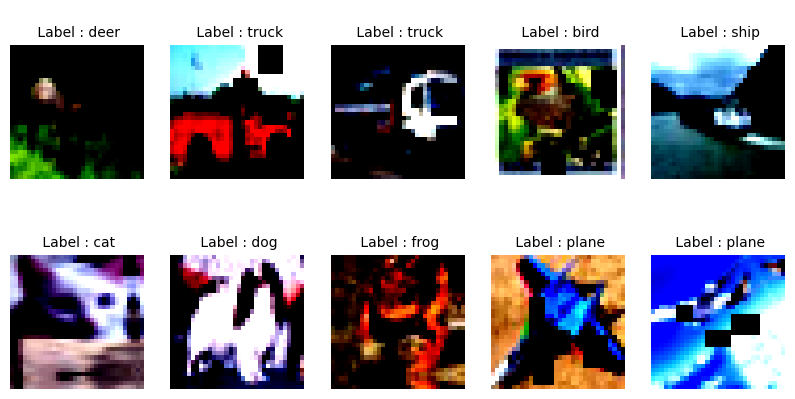

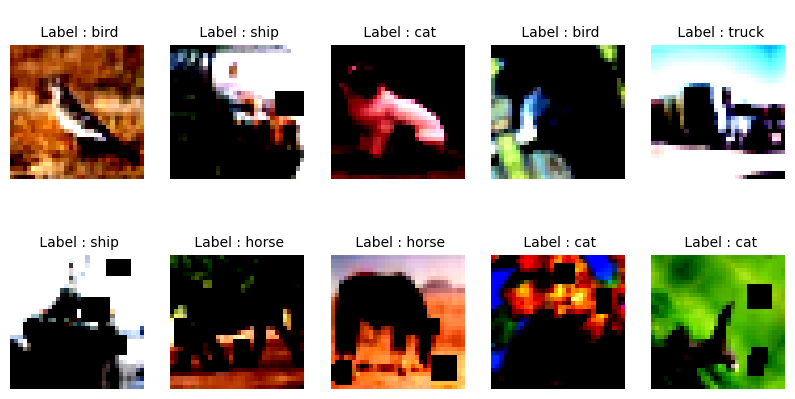

In [8]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

show_images(train_loader)
show_images(train_loader)

# Model Summary


In [9]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(norm='GN').to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
        GroupNorm-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1

# Train and Test of our model

In [10]:
from torch.optim.lr_scheduler import StepLR

train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

MAX_EPOCHS = 20
for epoch in range(MAX_EPOCHS):
    print("EPOCH:", epoch + 1 )
    train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)
    test(model, device, test_loader,test_losses, test_acc)

EPOCH: 1


Loss=1.8009793758392334 Batch_id=390 Accuracy=32.55: 100%|██████████| 391/391 [00:16<00:00, 23.20it/s]



Test set: Average loss: 1.5353, Accuracy: 4447/10000 (44.47%)

EPOCH: 2


Loss=1.4030076265335083 Batch_id=390 Accuracy=43.03: 100%|██████████| 391/391 [00:16<00:00, 23.05it/s]



Test set: Average loss: 1.3702, Accuracy: 5049/10000 (50.49%)

EPOCH: 3


Loss=1.4627046585083008 Batch_id=390 Accuracy=48.19: 100%|██████████| 391/391 [00:16<00:00, 24.17it/s]



Test set: Average loss: 1.2535, Accuracy: 5450/10000 (54.50%)

EPOCH: 4


Loss=1.4532662630081177 Batch_id=390 Accuracy=51.10: 100%|██████████| 391/391 [00:17<00:00, 22.40it/s]



Test set: Average loss: 1.2209, Accuracy: 5615/10000 (56.15%)

EPOCH: 5


Loss=1.13056218624115 Batch_id=390 Accuracy=52.92: 100%|██████████| 391/391 [00:16<00:00, 24.27it/s]



Test set: Average loss: 1.1550, Accuracy: 5789/10000 (57.89%)

EPOCH: 6


Loss=1.1526470184326172 Batch_id=390 Accuracy=54.82: 100%|██████████| 391/391 [00:16<00:00, 23.14it/s]



Test set: Average loss: 1.1091, Accuracy: 5987/10000 (59.87%)

EPOCH: 7


Loss=1.2766964435577393 Batch_id=390 Accuracy=56.41: 100%|██████████| 391/391 [00:16<00:00, 24.11it/s]



Test set: Average loss: 1.0462, Accuracy: 6269/10000 (62.69%)

EPOCH: 8


Loss=1.2094289064407349 Batch_id=390 Accuracy=57.32: 100%|██████████| 391/391 [00:16<00:00, 24.16it/s]



Test set: Average loss: 1.0826, Accuracy: 6213/10000 (62.13%)

EPOCH: 9


Loss=1.2313882112503052 Batch_id=390 Accuracy=58.26: 100%|██████████| 391/391 [00:16<00:00, 23.38it/s]



Test set: Average loss: 0.9975, Accuracy: 6435/10000 (64.35%)

EPOCH: 10


Loss=1.4453266859054565 Batch_id=390 Accuracy=59.08: 100%|██████████| 391/391 [00:15<00:00, 24.60it/s]



Test set: Average loss: 1.0325, Accuracy: 6377/10000 (63.77%)

EPOCH: 11


Loss=1.1703975200653076 Batch_id=390 Accuracy=60.07: 100%|██████████| 391/391 [00:16<00:00, 23.74it/s]



Test set: Average loss: 0.9491, Accuracy: 6644/10000 (66.44%)

EPOCH: 12


Loss=1.1556023359298706 Batch_id=390 Accuracy=60.60: 100%|██████████| 391/391 [00:16<00:00, 24.23it/s]



Test set: Average loss: 0.9426, Accuracy: 6648/10000 (66.48%)

EPOCH: 13


Loss=1.161578893661499 Batch_id=390 Accuracy=61.13: 100%|██████████| 391/391 [00:16<00:00, 23.94it/s]



Test set: Average loss: 0.9418, Accuracy: 6666/10000 (66.66%)

EPOCH: 14


Loss=0.7703971266746521 Batch_id=390 Accuracy=61.72: 100%|██████████| 391/391 [00:16<00:00, 23.82it/s]



Test set: Average loss: 0.9158, Accuracy: 6748/10000 (67.48%)

EPOCH: 15


Loss=1.0677701234817505 Batch_id=390 Accuracy=61.93: 100%|██████████| 391/391 [00:16<00:00, 23.83it/s]



Test set: Average loss: 0.9586, Accuracy: 6616/10000 (66.16%)

EPOCH: 16


Loss=0.9839639663696289 Batch_id=390 Accuracy=62.57: 100%|██████████| 391/391 [00:18<00:00, 21.61it/s]



Test set: Average loss: 0.8810, Accuracy: 6908/10000 (69.08%)

EPOCH: 17


Loss=0.9948147535324097 Batch_id=390 Accuracy=63.31: 100%|██████████| 391/391 [00:16<00:00, 23.74it/s]



Test set: Average loss: 0.8711, Accuracy: 6918/10000 (69.18%)

EPOCH: 18


Loss=0.9345189332962036 Batch_id=390 Accuracy=63.82: 100%|██████████| 391/391 [00:17<00:00, 22.81it/s]



Test set: Average loss: 0.8429, Accuracy: 7020/10000 (70.20%)

EPOCH: 19


Loss=1.0309523344039917 Batch_id=390 Accuracy=64.23: 100%|██████████| 391/391 [00:16<00:00, 23.88it/s]



Test set: Average loss: 0.8551, Accuracy: 7024/10000 (70.24%)

EPOCH: 20


Loss=1.2514039278030396 Batch_id=390 Accuracy=64.36: 100%|██████████| 391/391 [00:17<00:00, 22.14it/s]



Test set: Average loss: 0.8532, Accuracy: 6929/10000 (69.29%)



In [11]:
train_losses1 = [t.cpu().item() for t in train_losses]

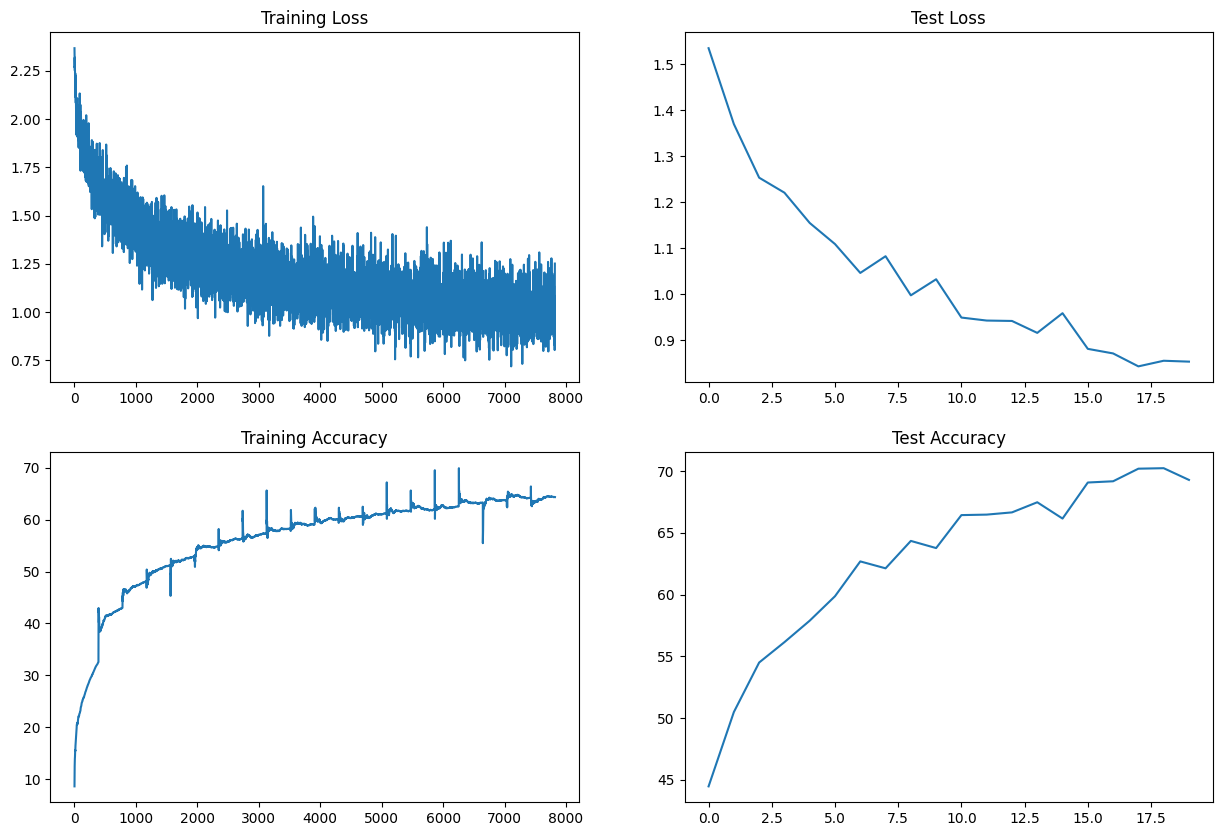

In [12]:
print_graph(train_losses1,train_acc, test_losses,test_acc)

In [13]:
wrong_prediction_list = []
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction_list.append((images[j], pred[j].item(), labels[j].item()))

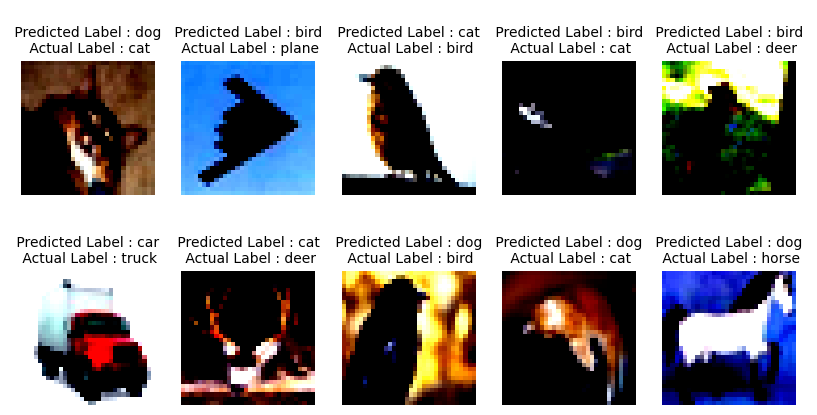

In [14]:
display_incorrect_images(wrong_prediction_list, n=10 )